# Individual Final - Wisely Chang Wu

The data being utilized for this final is the evictions data from NYC Open Data. 

* https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4/data

In [7]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd  
import numpy as np
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt

## Eviction Data

In [58]:
evictions = pd.read_csv('Evictions.csv')

In [11]:
evictions.columns

Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [10]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40492/17,337309,2130 TIEBOUT AVENUE,103/1ST FL,04/23/2018,Thomas,Bia,Residential,BRONX,10457,Not an Ejectment,Possession,40.853575,-73.898475,5.0,15.0,379.0,2013305.0,2.031430e+09,Mount Hope
1,K091444/17,388532,769 ST MARKS AVENUE,3-5E,03/12/2018,Richard,McCoy,Residential,BROOKLYN,11213,Not an Ejectment,Possession,40.675029,-73.946598,8.0,36.0,313.0,3030734.0,3.012210e+09,Crown Heights North
2,064158/18,86100,191-19 JAMAICA AVE,SECOND FLOOR LEFT,08/29/2018,Henry,Daley,Commercial,QUEENS,11423,Not an Ejectment,Possession,40.712604,-73.768501,12.0,23.0,482.0,4000000.0,4.104470e+09,Hollis
3,83867/16-2,6895,546 ISHAM STREET,22A,06/27/2017,George,"Essock, Jr.",Residential,MANHATTAN,10034,Not an Ejectment,Possession,40.866936,-73.919009,12.0,10.0,293.0,1064851.0,1.022270e+09,Marble Hill-Inwood
4,085641/18,91267,381 ESSEX STREET,2,09/04/2019,Henry,Daley,Residential,BROOKLYN,11208,Not an Ejectment,Possession,40.674648,-73.881858,5.0,37.0,1166.0,3088972.0,3.040040e+09,East New York


### 1. Describe the data, its structure, data types, formats etc 

The data shows the list of pending, scheduled, and executed evictions throughout the five boroughs within the years 2017 until now (present time). The data was sorted by Court Index Number, Docket Number, Eviction Address, Apartment Number, Executed Date, Marshal First Name, Marshal Last Name, Residential or Commercial (property type), Borough, Zip Code and Scheduled Status (Pending/Scheduled). 

### 2. Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions? 


In [16]:
evictions['Executed Date'].unique()

array(['04/23/2018', '03/12/2018', '08/29/2018', '06/27/2017',
       '09/04/2019', '08/22/2019', '10/17/2017', '08/24/2017',
       '07/19/2019', '02/24/2017', '07/15/2019', '04/14/2017',
       '03/18/2019', '08/13/2018', '10/23/2017', '04/16/2018',
       '03/22/2017', '01/23/2018', '02/15/2018', '12/06/2018',
       '06/26/2019', '03/14/2018', '02/28/2017', '10/04/2018',
       '08/23/2017', '04/08/2019', '02/01/2019', '12/17/2018',
       '06/28/2017', '01/28/2019', '04/16/2019', '01/24/2018',
       '09/20/2018', '12/17/2019', '05/13/2019', '08/27/2018',
       '11/03/2017', '05/22/2018', '05/03/2017', '10/10/2017',
       '04/15/2019', '03/02/2018', '03/04/2020', '01/29/2020',
       '03/14/2019', '11/28/2018', '03/11/2020', '05/30/2019',
       '12/03/2019', '05/07/2019', '02/08/2018', '01/11/2019',
       '07/16/2019', '03/16/2017', '03/22/2019', '10/26/2017',
       '11/30/2017', '01/29/2019', '07/13/2017', '01/04/2017',
       '06/04/2018', '06/13/2017', '01/24/2017', '04/06

In [22]:
date2017 = pd.read_csv('Evictions_2017.csv')
date2018 = pd.read_csv('Evictions_2018.csv')
date2019 = pd.read_csv('Evictions_2019.csv')
date2020 = pd.read_csv('Evictions_2020.csv')
date2021 = pd.read_csv('Evictions_2021.csv')

# 2017 

In [23]:
date2017.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,65795/15,1119,119-55 FARMERS BLVD. A/K/A 11955 FARMERS BLVD.,NaN,01/03/2017,Edward,Guida,Residential,QUEENS,11412,Not an Ejectment,Possession,40.686915,-73.761364,12.0,27.0,394.0,4272483.0,4.126440e+09,St. Albans
1,B26196/16,71646,1552 BRYANT AVENUE,1A,01/03/2017,Ileana,Rivera,Residential,BRONX,10460,Not an Ejectment,Possession,40.833725,-73.886743,3.0,17.0,157.0,2010880.0,2.030010e+09,Crotona Park East
2,N61641/16,90895,276-278 SHERMAN AVE,1D,01/03/2017,Darlene,Barone,Residential,MANHATTAN,10034,Not an Ejectment,Possession,40.866534,-73.918015,12.0,10.0,293.0,1064865.0,1.022280e+09,Marble Hill-Inwood
3,71008/16,54855,2 MARBLE HILL AVENUE,44-A,01/03/2017,Justin,Grossman,Residential,MANHATTAN,10463,Not an Ejectment,Possession,40.874848,-73.910831,8.0,10.0,309.0,1064670.0,1.022151e+09,Marble Hill-Inwood
4,B21812/16,90857,2302 BEAUMONT AVENUE,APT 8,01/03/2017,Darlene,Barone,Residential,BRONX,10458,Not an Ejectment,Possession,40.852171,-73.885446,6.0,15.0,391.0,2012861.0,2.031030e+09,Belmont


In [29]:
date2017 = gpd.GeoDataFrame(
    date2017, geometry=gpd.points_from_xy(date2017.Longitude, date2017.Latitude))

Text(0.5, 1.0, 'Evictions 2017 ')

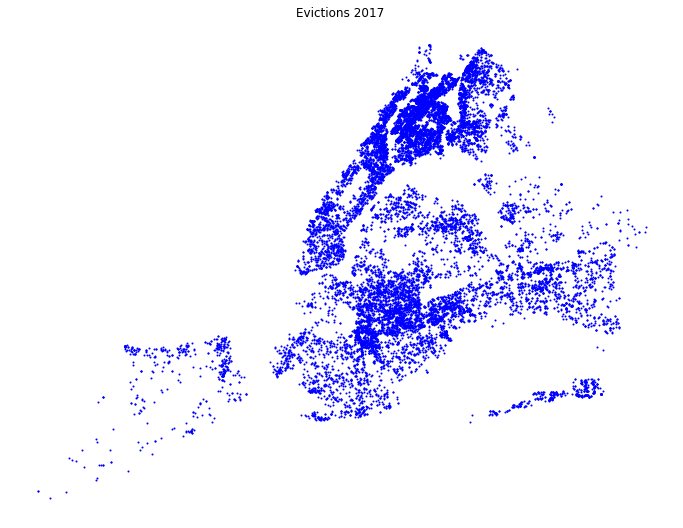

In [31]:
date2017.plot( color='blue',legend=True,figsize=(12, 12), markersize=1)
plt.axis('off')
plt.title('Evictions 2017 ')

In [24]:
len(date2017)

22530

# 2018

In [25]:
date2018.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,73517/17,475462,529 WEST 158TH STREE T,1C,01/02/2018,Danny,Weinheim,Residential,MANHATTAN,10032,Not an Ejectment,Possession,40.833898,-73.942531,12.0,7.0,245.0,1062778.0,1.021170e+09,Washington Heights South
1,89167/17,7057,262 EAST 55TH STREET - APT 3-B,3-B,01/02/2018,Robert,Renzulli,Residential,BROOKLYN,11203,Not an Ejectment,Possession,40.651516,-73.925520,17.0,41.0,938.0,3103021.0,3.047020e+09,Rugby-Remsen Village
2,251157/17,337413,2095 MADISON AVENUE,2D,01/02/2018,Thomas,Bia,Residential,MANHATTAN,10037,Not an Ejectment,Possession,40.809959,-73.937238,11.0,9.0,206.0,1054327.0,1.017560e+09,Central Harlem North-Polo Grounds
3,52602/17,6777,580 E. 94TH STREET,1,01/02/2018,Robert,Renzulli,Residential,BROOKLYN,11236,Not an Ejectment,Possession,40.653486,-73.915736,17.0,42.0,888.0,3103503.0,3.047140e+09,Rugby-Remsen Village
4,66247/17,7777,227-50 113TH AVENUE,NaN,01/02/2018,Bernard,Blake,Residential,QUEENS,11429,Not an Ejectment,Possession,40.703822,-73.729908,13.0,27.0,580.0,4242570.0,4.112470e+09,Queens Village


In [36]:
date2018 = gpd.GeoDataFrame(
    date2018, geometry=gpd.points_from_xy(date2018.Longitude, date2018.Latitude))

Text(0.5, 1.0, 'Evictions 2018')

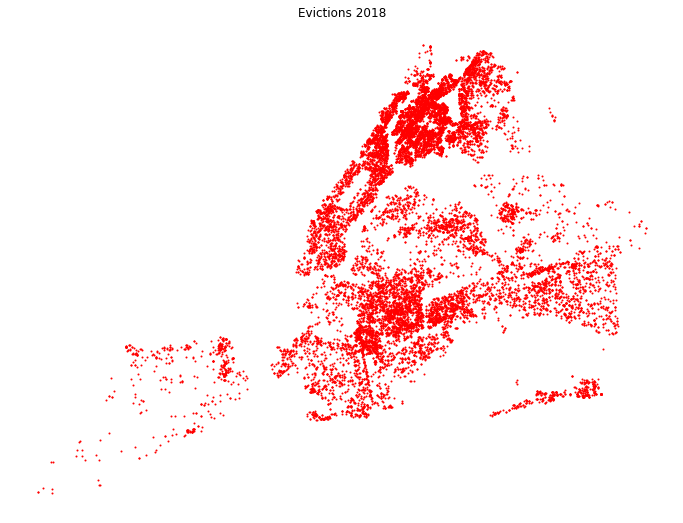

In [37]:
date2018.plot( color='red',legend=True,figsize=(12, 12), markersize=1)
plt.axis('off')
plt.title('Evictions 2018')

In [38]:
len(date2018)

21830

# 2019

In [39]:
date2019.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,53159/18,77448,16 NATALIE COURT,NaN,01/02/2019,Kenneth,Giachetta,Residential,STATEN ISLAND,10304,Not an Ejectment,Possession,40.630835,-74.085370,1.0,49.0,33.0,5129512.0,5.005800e+09,Grymes Hill-Clifton-Fox Hills
1,B41128/17B,84074,3285 ROMBOUTS AVENUE,4C,01/02/2019,Ileana,Rivera,Residential,BRONX,10475,Not an Ejectment,Possession,40.880090,-73.827604,10.0,12.0,46201.0,2114708.0,2.051410e+09,Co-op City
2,62756/18,86304,127-08 LIBERTY AVE NUE,ROOM #2,01/02/2019,Justin,Grossman,Residential,QUEENS,11419,Not an Ejectment,Possession,40.688752,-73.817663,10.0,28.0,15802.0,4204701.0,4.095810e+09,South Ozone Park
3,46330/18,485539,502 CONCORD AVENUE,3F,01/02/2019,Danny,Weinheim,Residential,BRONX,10455,Not an Ejectment,Possession,40.812015,-73.908516,1.0,8.0,35.0,2003944.0,2.025800e+09,Mott Haven-Port Morris
4,77235/18B,87624,1949 79TH STREET,ENTIRE 2ND FLOOR,01/02/2019,Justin,Grossman,Residential,BROOKLYN,11214,Not an Ejectment,Possession,40.609246,-73.995246,11.0,47.0,274.0,3162278.0,3.062620e+09,Bensonhurst West


In [40]:
date2019 = gpd.GeoDataFrame(
    date2019, geometry=gpd.points_from_xy(date2019.Longitude, date2019.Latitude))

Text(0.5, 1.0, 'Evictions 2019')

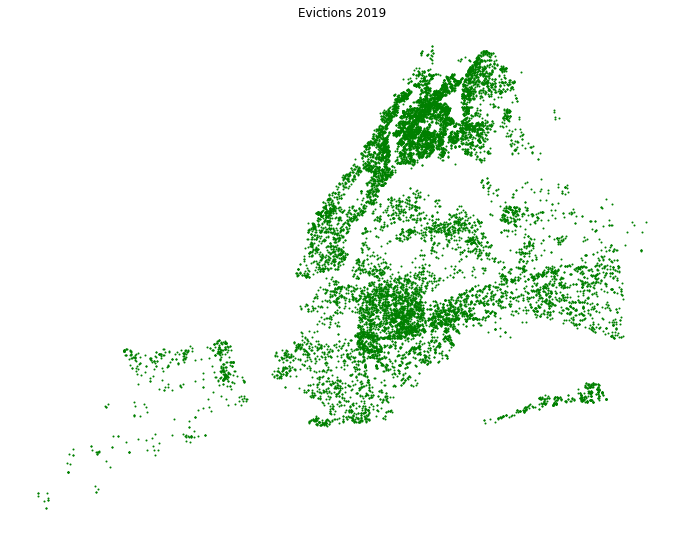

In [41]:
date2019.plot( color='green',legend=True,figsize=(12, 12), markersize=1)
plt.axis('off')
plt.title('Evictions 2019')

In [42]:
len(date2019)

18647

# 2020

In [43]:
date2020.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,35484/19,494073,184 MT. EDEN PARKWAY,UNIT 1D,01/02/2020,Danny,Weinheim,Residential,BRONX,10457,Not an Ejectment,Possession,40.842943,-73.910173,4.0,16.0,225.0,2007828.0,2.028200e+09,East Concourse-Concourse Village
1,72955/19,63530,1452 BUSHWICK AVENUE,#2,01/02/2020,Howard,Schain,Residential,BROOKLYN,11207,Not an Ejectment,Possession,40.683799,-73.908141,4.0,37.0,403.0,3080206.0,3.034500e+09,Bushwick South
2,73740/17A,76331,40 RICHMAN PLAZA,36B,01/02/2020,Justin,Grossman,Residential,BRONX,10453,Not an Ejectment,Possession,40.852084,-73.922436,5.0,16.0,53.0,2113629.0,2.028820e+09,University Heights-Morris Heights
3,65439/19,25138,2 BAYCLUB DRIVE,16Z-4,01/02/2020,Edward,Guida,Residential,QUEENS,11360,Not an Ejectment,Possession,40.779641,-73.780700,7.0,19.0,99704.0,4610766.0,4.058938e+09,Ft. Totten-Bay Terrace-Clearview
4,7083/19,93179,774 FOX STREET,1C,01/02/2020,Justin,Grossman,Residential,BRONX,10455,Not an Ejectment,Possession,40.816109,-73.897748,2.0,8.0,85.0,2005728.0,2.027200e+09,Longwood


In [44]:
date2020 = gpd.GeoDataFrame(
    date2020, geometry=gpd.points_from_xy(date2020.Longitude, date2020.Latitude))

Text(0.5, 1.0, 'Evictions 2020')

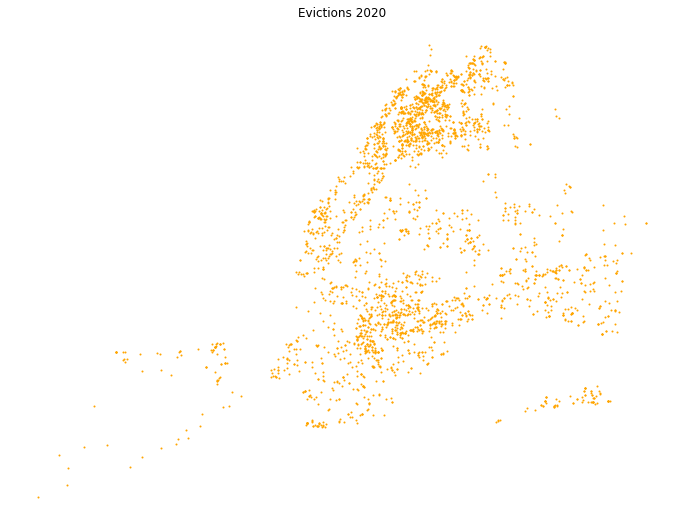

In [45]:
date2020.plot( color='orange',legend=True,figsize=(12, 12), markersize=1)
plt.axis('off')
plt.title('Evictions 2020')

In [46]:
len(date2020)

3387

# 2021

In [56]:
date2021.head(8)

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
0,71338/19,103189,14 DURYEA PLACE THE RETAIL COMMERCIAL RESTAURA...,NaN,01/04/2021,Henry,Daley,Commercial,BROOKLYN,11226,...,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
1,80034/19,63586,2118 AVENUE U,STORE,01/04/2021,Howard,Schain,Commercial,BROOKLYN,11229,...,Possession,40.599516,-73.950115,15.0,48.0,578.0,3199836.0,3.073540e+09,Madison,POINT (-73.95011 40.59952)
2,901310/19,358618,117 ROCKWOOD STREET,FIRST,01/11/2021,Thomas,Bia,Commercial,BRONX,10452,...,Possession,40.841944,-73.913260,4.0,14.0,209.0,2008013.0,2.028360e+09,West Concourse,POINT (-73.91326 40.84194)
3,55269/20,13639,66-31 OTTO ROAD,NaN,01/12/2021,Robert,Renzulli,Commercial,QUEENS,11385,...,Possession,40.705458,-73.889294,5.0,30.0,61301.0,4089237.0,4.036671e+09,Ridgewood,POINT (-73.88929 40.70546)
4,65405/19,12421,442A EAST 14TH STREET - THE STREET LEVEL STORE...,NaN,02/04/2021,Robert,Renzulli,Commercial,MANHATTAN,10009,...,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
5,79035/19,106064,2253 STRAUSS STRE ET A/K/A 47 NEWPORT STREET,STOREFRONT,02/09/2021,Justin,Grossman,Commercial,BROOKLYN,11212,...,Possession,40.658878,-73.913787,16.0,42.0,896.0,3082249.0,3.035970e+09,Brownsville,POINT (-73.91379 40.65888)
6,63780/19,208836,118-05 LIBERTY AVENUE FIRST FLOOR STORE BASEME...,NaN,03/02/2021,Richard,Capuano,Commercial,QUEENS,11419,...,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
7,64106/19,13012,435 W 31ST STREET,23 Q,05/03/2021,Robert,Renzulli,Residential,MANHATTAN,10001,...,Possession,40.751916,-73.998686,4.0,3.0,103.0,1089664.0,1.007298e+09,Hudson Yards-Chelsea-Flatiron-Union Square,POINT (-73.99869 40.75192)


date2021 = gpd.GeoDataFrame(
    date2021, geometry=gpd.points_from_xy(date2021.Longitude, date2021.Latitude))

Text(0.5, 1.0, 'Evictions 2021')

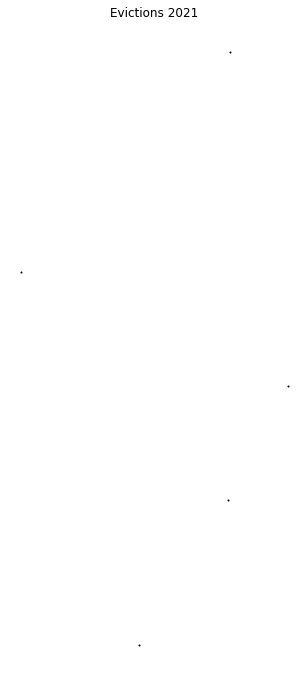

In [52]:
date2021.plot( color='black',legend=True,figsize=(12, 12), markersize=1)
plt.axis('off')
plt.title('Evictions 2021')

In [53]:
len(date2021)

8

The eviction trends have changed for each year because they have steeply decreased from the time frame of 2017 to 2021. The year that had the largest amount of evictions was 2017 with a total of 22,530 evictions. The year with the least amount of evictions is evidently 2021 with a total of 8 evictions so far. Some of my assumptions as to why the number of evictions decreased tremendously between the years 2019 and 2020 could be due to the COVID-19 Pandemic. In addition, the 2021 number of evictions are not representative of the entire year since it only goes to 05/03/21 as the most recent date.

### 3. What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found. 


In [61]:
evictions['Residential/Commercial'].value_counts()

Residential    60810
Commercial      5593
Name: Residential/Commercial, dtype: int64

The ratio of commerical to residential evictions in the entire data is 5593 to 60810. Commercial/Residential = 0.091975

## 2017

In [69]:
date2017['Residential/Commercial'].value_counts()

Residential    20810
Commercial      1720
Name: Residential/Commercial, dtype: int64

Commercial to Residential = 1720 to 20810 --> 0.08265

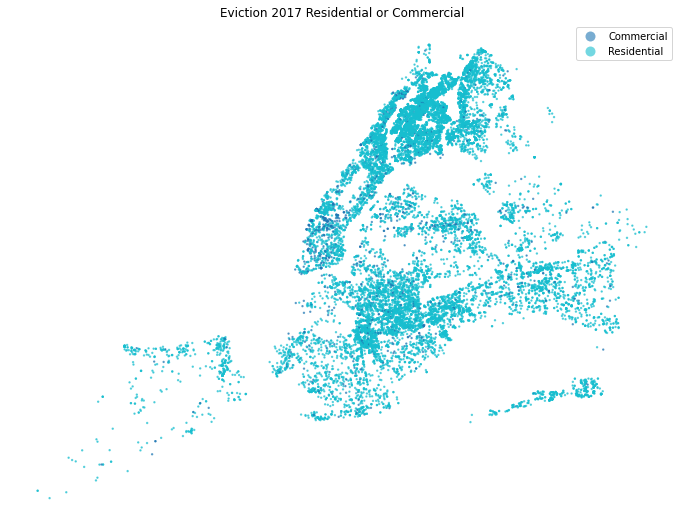

In [65]:
#plot by 'Residential/Commercial':

ax = date2017.plot(column='Residential/Commercial',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)

plt.title('Eviction 2017 Residential or Commercial')
plt.axis('off')
plt.show()

## 2018

In [67]:
date2018['Residential/Commercial'].value_counts()

Residential    19988
Commercial      1842
Name: Residential/Commercial, dtype: int64

Commercial to Residential = 1842 to 19988 --> 0.09215

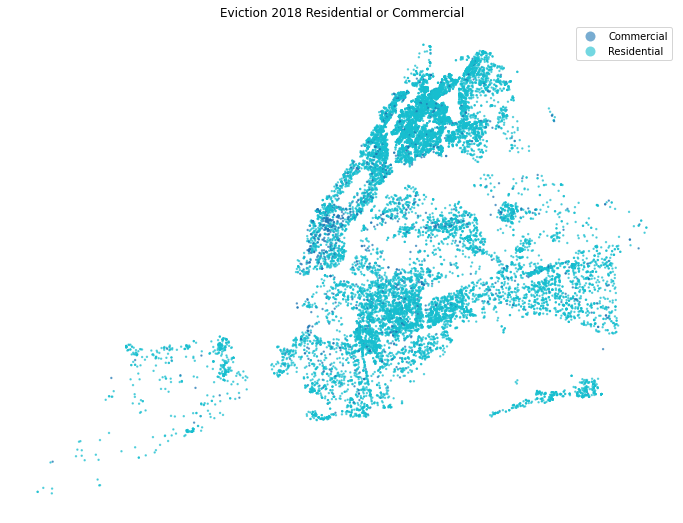

In [68]:
#plot by 'Residential/Commercial':

ax = date2018.plot(column='Residential/Commercial',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)

plt.title('Eviction 2018 Residential or Commercial')
plt.axis('off')
plt.show()

## 2019

In [70]:
date2019['Residential/Commercial'].value_counts()

Residential    16975
Commercial      1672
Name: Residential/Commercial, dtype: int64

Commercial to Residential = 1672 to 16975 --> 0.09849

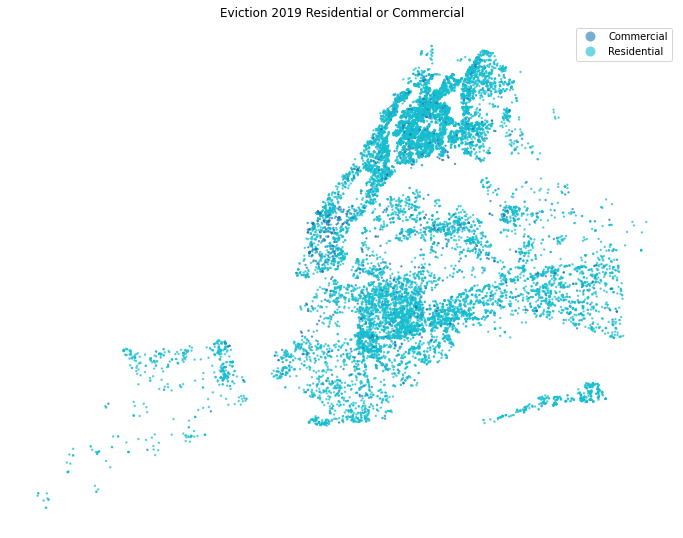

In [71]:
#plot by 'Residential/Commercial':

ax = date2019.plot(column='Residential/Commercial',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)

plt.title('Eviction 2019 Residential or Commercial')
plt.axis('off')
plt.show()

## 2020

In [72]:
date2020['Residential/Commercial'].value_counts()

Residential    3035
Commercial      352
Name: Residential/Commercial, dtype: int64

Commercial to Residential = 352 to 3035 --> 0.11598

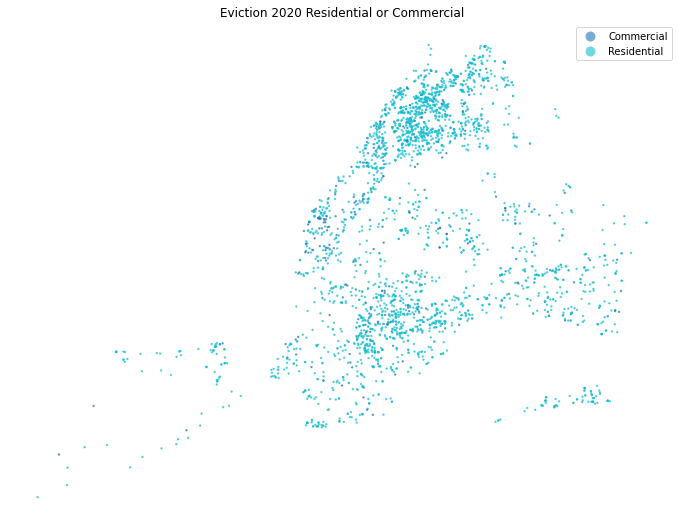

In [73]:
#plot by 'Residential/Commercial':

ax = date2020.plot(column='Residential/Commercial',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)

plt.title('Eviction 2020 Residential or Commercial')
plt.axis('off')
plt.show()

## 2021

In [74]:
date2021['Residential/Commercial'].value_counts()

Commercial     7
Residential    1
Name: Residential/Commercial, dtype: int64

Commercial to Residential = 1 to 7 --> 0.14285

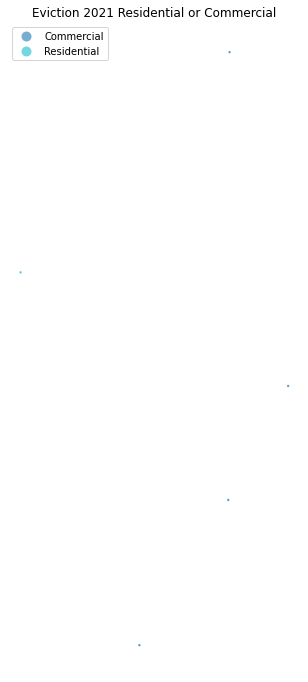

In [75]:
#plot by 'Residential/Commercial':

ax = date2021.plot(column='Residential/Commercial',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)

plt.title('Eviction 2021 Residential or Commercial')
plt.axis('off')
plt.show()

This ratio was not constant over time as seen by the ratios calculated for each year. The trends that I found was that most commercial evictions were within Manhattan and the residential evictions were scattered all over the five boroughs (with the exception of the 2021 dataset). 

### 4. What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)? 

In [80]:
evictions['Marshal Last Name'].unique()

array(['Bia', 'McCoy', 'Daley', 'Essock, Jr.', 'Barone', 'Rivera', 'Kemp',
       'Grossman', 'Giglio', 'Chevlowe', 'Guida', 'Weinheim', 'Blake',
       'Pazant', 'Rose', 'Capuano', 'Villanueva', 'Solimine', 'Renzulli',
       'Schain', 'Locascio', 'Marchisotto', 'Giachetta', 'Essock',
       'Barbarovich', 'Siracusa', 'Powell'], dtype=object)

In [83]:
marshals = evictions.groupby(['Marshal First Name','Marshal Last Name']).count()

In [86]:
len(marshals)

28

In [90]:
marshals.tail(28)

,,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
Marshal First Name,Marshal Last Name,,,,,,,,,,,,,,,,,,
Alfred,Locascio,1425,1425,1425,1320,1425,1425,1425,1425,1425,1425,1321,1321,1321,1321,1321,1320,1320,1321
Bernard,Blake,446,446,446,81,446,446,446,446,446,446,428,428,428,428,428,427,427,428
Bruce,Kemp,366,366,366,290,366,366,366,366,366,366,301,301,301,301,301,301,301,301
Charles,Marchisotto,394,394,394,386,394,394,394,394,394,394,47,47,47,47,47,47,47,47
Danny,Weinheim,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5101,5101,5101,5101,5101,5099,5099,5101
Darlene,Barone,3730,3730,3730,3584,3730,3730,3730,3730,3730,3730,3656,3656,3656,3656,3656,3650,3650,3656
Edward,Guida,5422,5422,5422,2459,5422,5422,5422,5422,5422,5422,5328,5328,5328,5328,5328,5315,5315,5328
Frank,Siracusa,551,551,551,278,551,551,551,551,551,551,332,332,332,332,332,332,332,332
Gary,Rose,1557,1557,1557,1188,1557,1557,1557,1557,1557,1557,1348,1348,1348,1348,1348,1344,1344,1348


Text(0.5, 1.0, 'Marshals with the highest eviction cases')

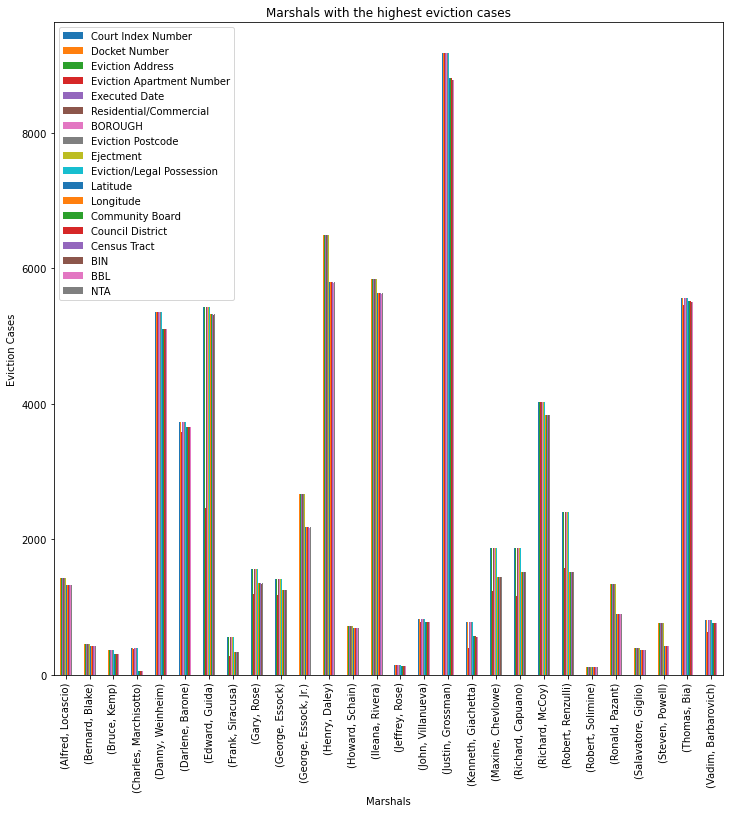

In [104]:
marshals.plot.bar(legend=True,figsize=(12, 12))
plt.ylabel("Eviction Cases")
plt.xlabel("Marshals")
plt.title("Marshals with the highest eviction cases")

I am not sure if this is correct but I think the names of the marshals with the highest evictions are Justin Grossman, Henry Daley, Ileana Rivera, Thomas Bia, and Edward Guida. 

### 5. How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts. 

In [106]:
nycpop = pd.read_csv('New_York_City_Population_by_Borough__1950_-_2040.csv')

In [107]:
nycpop.columns

Index(['Age Group', 'Borough', '1950', '1950 - Boro share of NYC total',
       '1960', '1960 - Boro share of NYC total', '1970',
       '1970 - Boro share of NYC total', '1980',
       '1980 - Boro share of NYC total', '1990',
       '1990 - Boro share of NYC total', '2000',
       '2000 - Boro share of NYC total', '2010',
       '2010 - Boro share of NYC total', '2020',
       '2020 - Boro share of NYC total', '2030',
       '2030 - Boro share of NYC total', '2040',
       '2040 - Boro share of NYC total'],
      dtype='object')

In [111]:
nycpop.tail(5)

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
1,Total Population,Bronx,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1332650,16.64,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50
2,Total Population,Brooklyn,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2465326,30.78,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47
3,Total Population,Manhattan,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1537195,19.20,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74
4,Total Population,Queens,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2229379,27.84,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73
5,Total Population,Staten Island,191555,2.43,221991,2.85,295443,3.74,352121,4.98,...,443728,5.54,468730,5.69,487155,5.70,497749,5.64,501109,5.55


In [118]:
nycpopboro = nycpop.groupby(['Borough','2020']).count()

In [133]:
nycpopboro.tail(6)

,,Age Group,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,1990,1990 - Boro share of NYC total,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
Borough,2020,,,,,,,,,,,,,,,,,,,,
Bronx,1446788,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Brooklyn,2648452,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Manhattan,1638281,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Queens,2330295,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Staten Island,487155,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
NYC Total,8550971,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [125]:
date2017['BOROUGH'].value_counts()

BRONX            7662
BROOKLYN         6357
QUEENS           4325
MANHATTAN        3452
STATEN ISLAND     734
Name: BOROUGH, dtype: int64

In [126]:
date2018['BOROUGH'].value_counts()

BRONX            7140
BROOKLYN         6157
QUEENS           4452
MANHATTAN        3390
STATEN ISLAND     691
Name: BOROUGH, dtype: int64

In [127]:
date2019['BOROUGH'].value_counts()

BRONX            6188
BROOKLYN         5312
QUEENS           3705
MANHATTAN        2806
STATEN ISLAND     636
Name: BOROUGH, dtype: int64

In [128]:
date2020['BOROUGH'].value_counts()

BRONX            1061
BROOKLYN         1003
QUEENS            693
MANHATTAN         518
STATEN ISLAND     112
Name: BOROUGH, dtype: int64

In [129]:
date2021['BOROUGH'].value_counts()

BROOKLYN     3
QUEENS       2
MANHATTAN    2
BRONX        1
Name: BOROUGH, dtype: int64

Over time, you can see that the amount of eviction cases are the highest within the Bronx and Brooklyn. When looking at the total population of each borough (within 2020), you can see that the highest populated boroughs are Brooklyn and Queens.

### 6. Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings. 

### 7. Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections. 


An additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood could be  . 